In [ ]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\training.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Sampling_Data\Smote_dataset.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [19]:
df.head()

,Unnamed: 0,id,ref,subtitle,creatorname,totalbytes,lastupdated,downloadcount,title,tags,...,download_view_ratio,num_tags,title_length,subtitle_length,creator_popularity,owner_popularity,lastupdated_month,lastupdated_day,lastupdated_weekday,cluster
0,0,1.652531,-1.497901,-1.343173,-1.482264,-0.205871,1.440289,-0.334293,-1.148158,-1.305056,...,0.054731,0.644314,0.521569,1.310725,0.0,-0.06614,0.890462,0.152226,0.535769,0
1,1,1.608563,-1.581849,0.951414,-1.578557,-0.205876,1.295437,0.105377,-0.349943,0.271367,...,0.015678,0.321751,1.770817,0.682214,0.0,-0.06614,0.890462,-1.626624,-0.467145,0
2,2,1.672062,-1.224657,-0.147321,-1.218896,-0.205877,1.522592,-0.276472,0.955542,1.099529,...,0.080659,0.063700,0.789265,0.853626,0.0,-0.06614,0.890462,1.152829,1.538684,0
3,3,1.690704,-1.434528,-1.140709,-1.420537,-0.205814,1.599133,-0.329493,-1.527142,-0.562436,...,0.141278,0.708827,0.253873,0.796489,0.0,-0.06614,1.189175,-1.515446,1.538684,0
4,4,1.583257,-1.599133,-1.353049,-1.588433,-0.205741,1.204905,0.203582,-1.403888,-0.790862,...,0.161541,0.902365,0.878497,1.310725,0.0,-0.06614,0.591749,0.485760,1.037227,0


# Models Training Process 

In [21]:
df['cluster'].unique()

array([0, 1, 2, 4, 3])

# RandomForestClassifier TRAINING 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X va y ajratamiz
X = df.drop('cluster', axis=1)
y = df['cluster']     # CLASS (label)

# Train / Validation / Test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Model
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'   # agar classlar notekis bo'lsa
)
rf.fit(X_train, y_train)

# Baholash
y_pred = rf.predict(X_val)

print("🎯 Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

🎯 Validation Accuracy: 0.9984496124031008

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       774
           1       0.99      1.00      1.00       774
           2       1.00      1.00      1.00       774
           3       1.00      1.00      1.00       774
           4       1.00      1.00      1.00       774

    accuracy                           1.00      3870
   macro avg       1.00      1.00      1.00      3870
weighted avg       1.00      1.00      1.00      3870


🧩 Confusion Matrix:
 [[770   4   0   0   0]
 [  2 772   0   0   0]
 [  0   0 774   0   0]
 [  0   0   0 774   0]
 [  0   0   0   0 774]]


# Save RandomForestClassifier Model 

In [23]:
import joblib
joblib.dump(rf, r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Simple_Models\RandomForestClassifier.joblib")
print("✅ Model muvaffaqiyatli saqlandi.")

✅ Model muvaffaqiyatli saqlandi.


# DecisionTreeClassifier TRAINING 

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Baholash
y_pred_dt = dt.predict(X_val)

print("🎯 Accuracy:", accuracy_score(y_val, y_pred_dt))
print("⚡ F1-score (macro):", f1_score(y_val, y_pred_dt, average='macro'))

print("\n📋 Classification Report:")
print(classification_report(y_val, y_pred_dt))

🎯 Accuracy: 0.9961240310077519
⚡ F1-score (macro): 0.9961218522522536

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       774
           1       0.99      0.99      0.99       774
           2       1.00      1.00      1.00       774
           3       1.00      1.00      1.00       774
           4       1.00      1.00      1.00       774

    accuracy                           1.00      3870
   macro avg       1.00      1.00      1.00      3870
weighted avg       1.00      1.00      1.00      3870



# Save DecisionTreeClassifier Model 

In [25]:
import joblib
joblib.dump(dt, r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Simple_Models\DecisionTreeClassifier.joblib")
print("✅ Model muvaffaqiyatli saqlandi.")

✅ Model muvaffaqiyatli saqlandi.


# XGBClassifier TRAINING 

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X va y ajratamiz
X = df.drop('cluster', axis=1)
y = df['cluster']

# Train / Validation / Test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Model (XGBoost)
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softmax',   # cluster classification
    eval_metric='mlogloss'
)

# Fit
xgb.fit(X_train, y_train)

# Baholash
y_pred = xgb.predict(X_val)

print("🎯 Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

🎯 Validation Accuracy: 0.9992248062015504

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       774
           1       1.00      1.00      1.00       774
           2       1.00      1.00      1.00       774
           3       1.00      1.00      1.00       774
           4       1.00      1.00      1.00       774

    accuracy                           1.00      3870
   macro avg       1.00      1.00      1.00      3870
weighted avg       1.00      1.00      1.00      3870


🧩 Confusion Matrix:
 [[772   2   0   0   0]
 [  0 774   0   0   0]
 [  0   1 773   0   0]
 [  0   0   0 774   0]
 [  0   0   0   0 774]]


# Save XGBClassifier Model 

In [27]:
import joblib
joblib.dump(xgb, r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Simple_Models\XGBClassifier.joblib")
print("✅ Model muvaffaqiyatli saqlandi.")

✅ Model muvaffaqiyatli saqlandi.


# LogisticRegression TRAINING 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Model
lr = LogisticRegression(random_state=42, max_iter=1000)  # max_iter katta bo'lishi mumkin
lr.fit(X_train, y_train)

# Baholash
y_pred_lr = lr.predict(X_val)

print("🎯 Accuracy:", accuracy_score(y_val, y_pred_lr))
print("⚡ F1-score (macro):", f1_score(y_val, y_pred_lr, average='macro'))

print("\n📋 Classification Report:")
print(classification_report(y_val, y_pred_lr))


🎯 Accuracy: 0.9935400516795866
⚡ F1-score (macro): 0.9935363919862269

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       774
           1       0.98      0.99      0.99       774
           2       0.99      0.99      0.99       774
           3       1.00      1.00      1.00       774
           4       0.99      1.00      1.00       774

    accuracy                           0.99      3870
   macro avg       0.99      0.99      0.99      3870
weighted avg       0.99      0.99      0.99      3870



c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Save LogisticRegression Model 

In [29]:
import joblib
joblib.dump(lr, r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Simple_Models\LogisticRegression.joblib")
print("✅ Model muvaffaqiyatli saqlandi.")

✅ Model muvaffaqiyatli saqlandi.


# Jami: Natijalarni Taqqoslash 

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:38:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_6584\2792714219.py:50: FutureWarning: 

Passing `palette` w

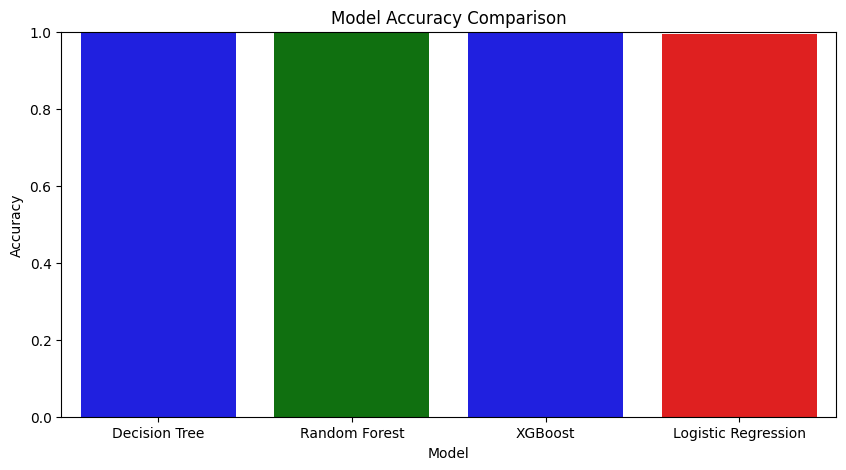

C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_6584\2792714219.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-score", data=results_df, palette=color_map(results_df["F1-score"]))


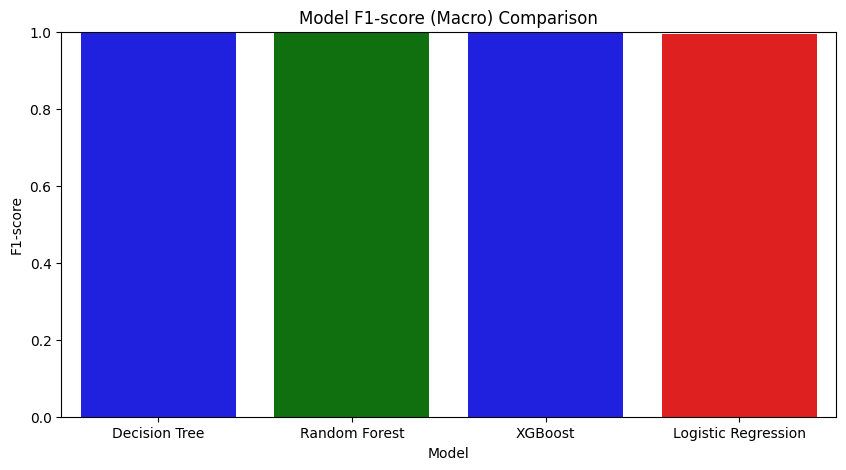

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Modellar
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

results = {"Model": [], "Accuracy": [], "F1-score": []}

# Modellarni o'qitish va baholash
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')
    
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1-score"].append(f1)

results_df = pd.DataFrame(results)

# Ranglarni aniqlash funksiyasi
def color_map(values):
    colors = []
    max_val = max(values)
    min_val = min(values)
    for v in values:
        if v == max_val:
            colors.append("green")  # eng yaxshi
        elif v == min_val:
            colors.append("red")    # eng yomon
        else:
            colors.append("blue")   # o'rtacha
    return colors

# Vizualizatsiya
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette=color_map(results_df["Accuracy"]))
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1-score", data=results_df, palette=color_map(results_df["F1-score"]))
plt.title("Model F1-score (Macro) Comparison")
plt.ylim(0,1)
plt.show()


# Cros Validation Tekshirish Natijalari 

In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Accuracy bo‘yicha 5-fold cross-validation
acc_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("📊 Accuracy (5-fold):", acc_scores)
print("📈 Accuracy O'rtacha:", acc_scores.mean())

# Cross-val prediction orqali F1-score va classification report
y_pred_cv = cross_val_predict(rf, X, y, cv=5)
f1 = f1_score(y, y_pred_cv, average='macro')
print("⚡ F1-score (macro, cross-val):", f1)

print("\n📋 Classification Report (cross-val predictions):")
print(classification_report(y, y_pred_cv))


📊 Accuracy (5-fold): [0.95478036 0.9994832  0.9997416  0.9997416  1.        ]
📈 Accuracy O'rtacha: 0.9907493540051678
⚡ F1-score (macro, cross-val): 0.9907366353614615

📋 Classification Report (cross-val predictions):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      3870
           1       0.96      1.00      0.98      3870
           2       1.00      1.00      1.00      3870
           3       1.00      1.00      1.00      3870
           4       1.00      1.00      1.00      3870

    accuracy                           0.99     19350
   macro avg       0.99      0.99      0.99     19350
weighted avg       0.99      0.99      0.99     19350

